In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.DataFrame(data=pd.read_csv('diabetes_prediction_dataset.csv'))
# df = df.sample(1500)
display(df.head())


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#  750 rows sample for class 1 (diabetes == "1")
df1 = df.loc[df['diabetes'] == 1]
df1 = df1.sample(750)

#  750 rows sample for class 0 (diabetes == "0")
df0 = df.loc[df['diabetes'] == 0]
df0 = df0.sample(750)


dfData=df1.append(df0)
display(dfData)

# check data size
diabetes_counts_grouped = dfData.groupby('diabetes').size()
print("Count of diabetes 1 (grouped):", diabetes_counts_grouped.get(1, 0))
print("Count of diabetes 0 (grouped):", diabetes_counts_grouped.get(0, 0))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
85505,Male,65.0,0,0,current,41.39,7.0,240,1
75611,Male,47.0,1,0,current,33.64,7.0,140,1
89504,Female,42.0,0,0,No Info,36.09,5.7,260,1
46058,Female,57.0,1,0,never,39.28,5.8,240,1
2250,Male,54.0,0,0,No Info,34.15,6.0,240,1
...,...,...,...,...,...,...,...,...,...
22796,Female,19.0,0,0,current,29.99,5.7,100,0
97662,Male,24.0,0,0,never,31.87,5.7,80,0
65555,Female,64.0,0,0,never,51.00,6.2,126,0
3423,Male,56.0,0,0,never,27.32,5.8,130,0


Count of diabetes 1 (grouped): 750
Count of diabetes 0 (grouped): 750


In [ ]:

# # Select 15% of data with diabetes
# diabetes_data = df[df['diabetes'] == 1].sample(frac=0.015)

# # Select 15% of data without diabetes
# non_diabetes_data = df[df['diabetes'] == 0].sample(frac=0.015)

# # Concatenate the two subsets into a new DataFrame
# dfData = pd.concat([diabetes_data, non_diabetes_data])

# # If you want to shuffle the selected data
# dfData = dfData.sample(frac=1).reset_index(drop=True)
# dfData

# count diabetes data from shorter data
# diabetes_counts_grouped = dfData.groupby('diabetes').size()

# # Or, if you used groupby and size
# print("Count of diabetes 1 (grouped):", diabetes_counts_grouped.get(1, 0))
# print("Count of diabetes 0 (grouped):", diabetes_counts_grouped.get(0, 0))

In [ ]:
# df.info()

In [ ]:
# mengubah data numerik dan kategorikal
cat_cols = [col for col in df.columns if df[col].dtype == 'object' ]
num_cols = [col for col in df.columns if df[col].dtype != 'object' ]

# preprocessing

menghapus outlier

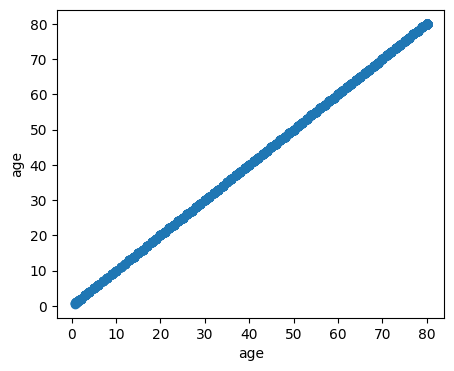

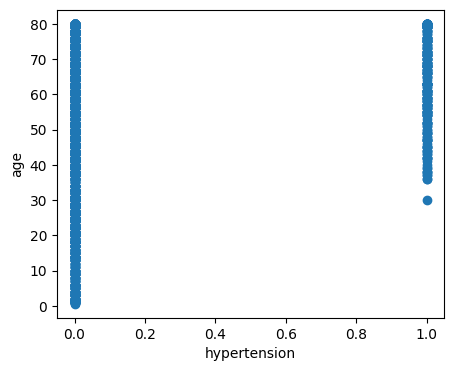

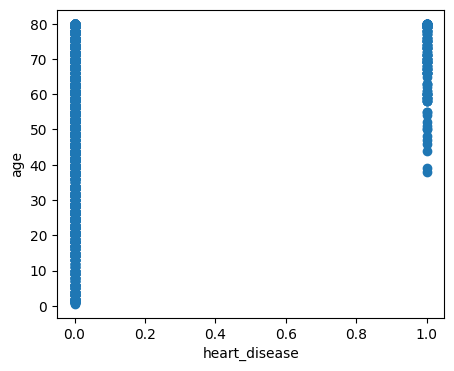

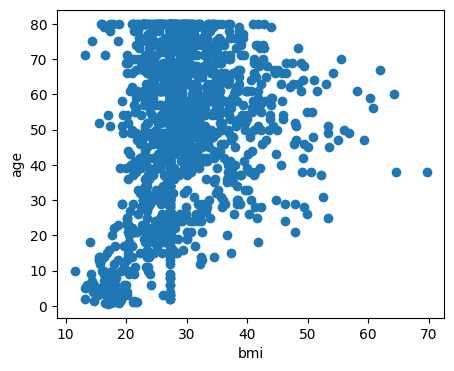

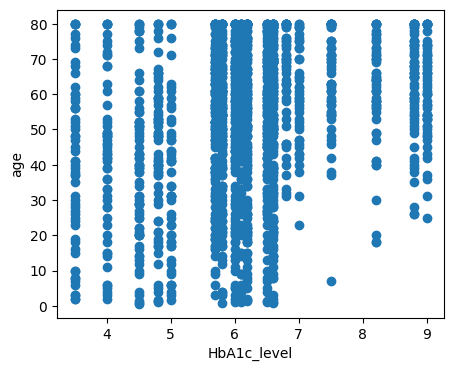

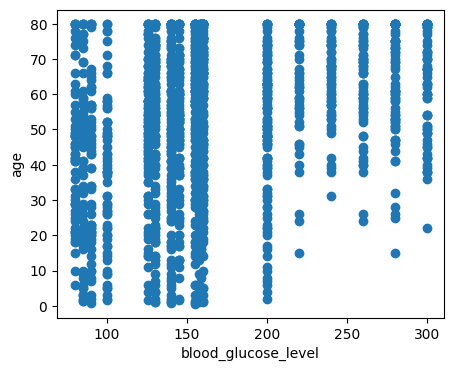

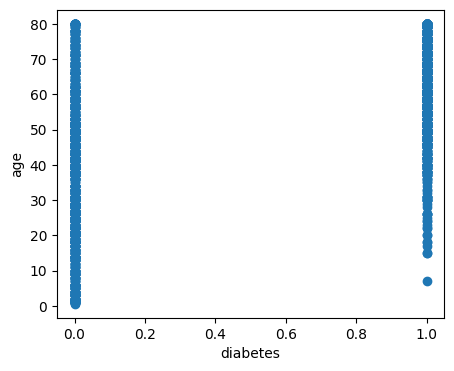

In [ ]:
for col in num_cols:
  fig, ax = plt.subplots(figsize=(5, 4))
  ax.scatter(dfData[col],dfData['age'])
  ax.set_xlabel(col)
  ax.set_ylabel('age')
plt.show()


In [ ]:
# mendata value fitur outlier
conditions = [
    ["bmi", ">", 60],
]
# menampung outlier
df_filtered = pd.DataFrame()
display (df_filtered)
for col in conditions:
  attribute, operator, threshold = col
  if operator == ">":
        df_temp = dfData.loc[dfData[attribute] > threshold]
  elif operator == "<":
        df_temp = dfData.loc[dfData[attribute] < threshold]
  df_filtered = df_filtered.append(df_temp, ignore_index=True)
# hasil outliernya dicocokan dan dihapus
dfData = pd.merge(dfData,df_filtered, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

display(dfData)

""


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,65.0,0,0,current,41.39,7.0,240,1
1,Male,47.0,1,0,current,33.64,7.0,140,1
2,Female,42.0,0,0,No Info,36.09,5.7,260,1
3,Female,57.0,1,0,never,39.28,5.8,240,1
4,Male,54.0,0,0,No Info,34.15,6.0,240,1
...,...,...,...,...,...,...,...,...,...
1495,Female,19.0,0,0,current,29.99,5.7,100,0
1496,Male,24.0,0,0,never,31.87,5.7,80,0
1497,Female,64.0,0,0,never,51.00,6.2,126,0
1498,Male,56.0,0,0,never,27.32,5.8,130,0


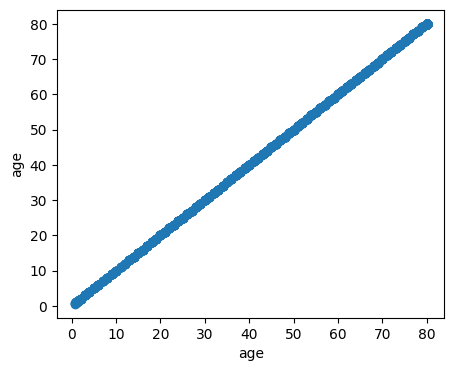

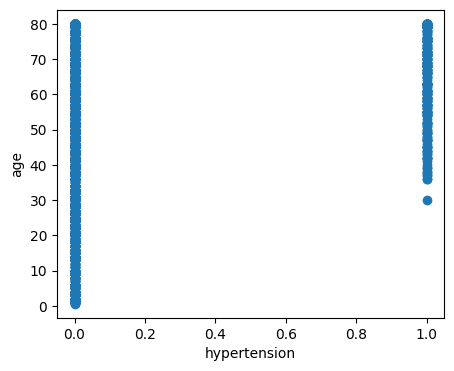

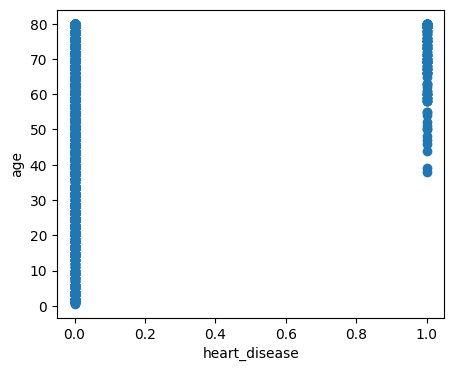

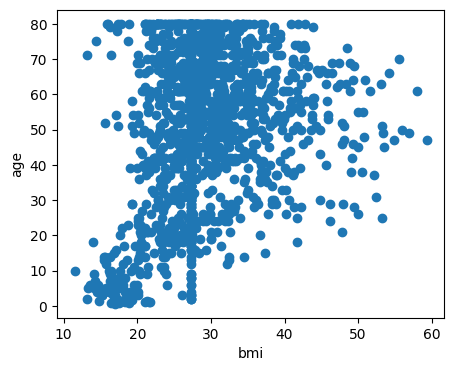

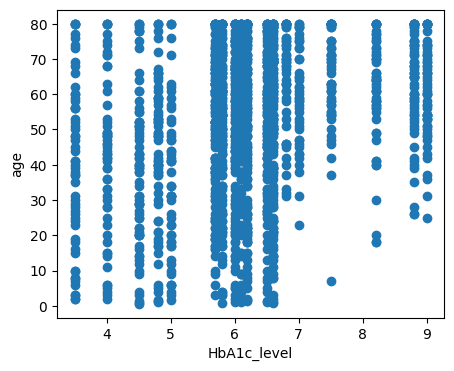

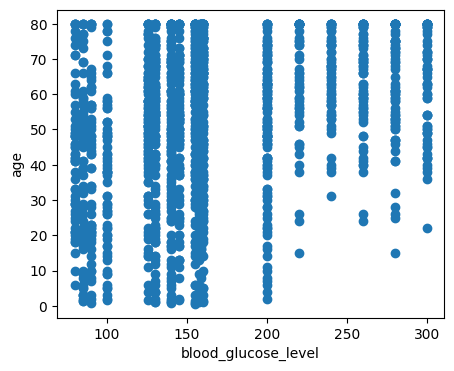

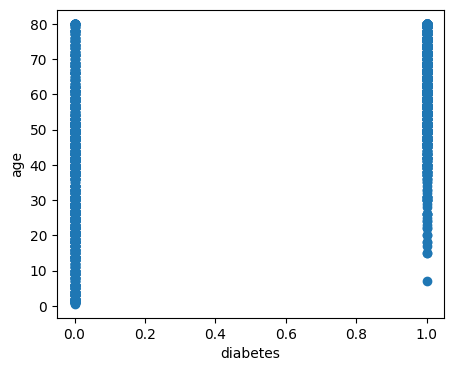

In [ ]:
for col in num_cols:
  fig, ax = plt.subplots(figsize=(5, 4))
  ax.scatter(dfData[col],dfData['age'])
  ax.set_xlabel(col)
  ax.set_ylabel('age')
plt.show()

# data yang sudah tidatk ada outlier

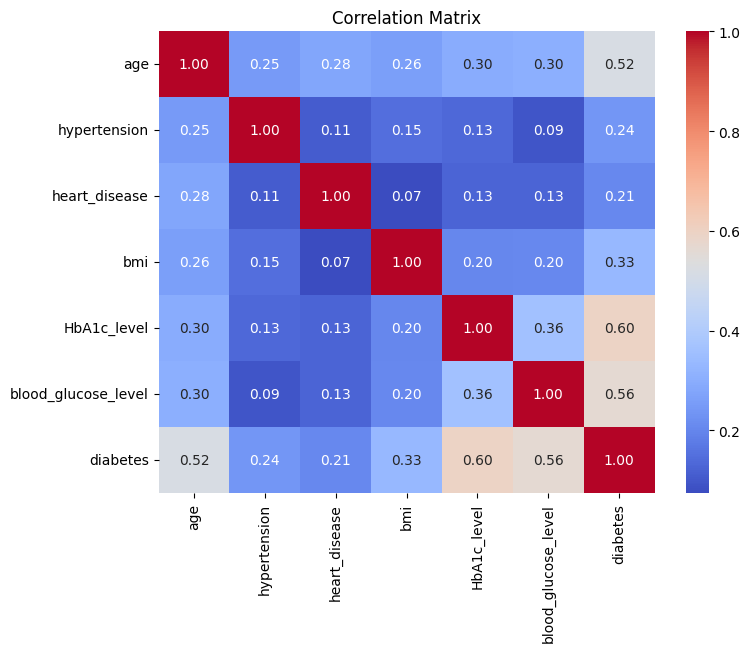

In [ ]:
correlation_matrix = dfData.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# normalisasi

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# normalisasi data menggunakan label encoder
le = LabelEncoder()
scaler = MinMaxScaler()


for col in cat_cols:
    dfData[col] = le.fit_transform(dfData[col])
    model = scaler.fit(dfData[[col]])
    dfData[col] = model.transform(dfData[[col]])


for col in num_cols:
  if col == 'diabetes' :
    continue
  else:
    model = scaler.fit(dfData[[col]])
    dfData[col] = model.transform(dfData[[col]])

display(dfData)
dfSample = dfData.sample(31)
# dfSample.to_excel("samplus.xlsx")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,0.810988,0.0,0.0,0.2,0.625157,0.636364,0.727273,1
1,1.0,0.584173,1.0,0.0,0.2,0.463226,0.636364,0.272727,1
2,0.0,0.521169,0.0,0.0,0.0,0.514417,0.400000,0.818182,1
3,0.0,0.710181,1.0,0.0,0.8,0.581070,0.418182,0.727273,1
4,1.0,0.672379,0.0,0.0,0.0,0.473882,0.454545,0.727273,1
...,...,...,...,...,...,...,...,...,...
1495,0.0,0.231351,0.0,0.0,0.2,0.386962,0.400000,0.090909,0
1496,1.0,0.294355,0.0,0.0,0.8,0.426243,0.400000,0.000000,0
1497,0.0,0.798387,0.0,0.0,0.8,0.825951,0.490909,0.209091,0
1498,1.0,0.697581,0.0,0.0,0.8,0.331174,0.418182,0.227273,0


# membuat model

In [ ]:
# pembuatan model dan spliting data untuk algoritma FKNN
from sklearn.model_selection import train_test_split

ind_col = [col for col in dfData.columns if col != 'diabetes']
dep_col = 'diabetes'

X = dfData[ind_col]
y = dfData[dep_col]

# Split the data menjadi 20% uji dan 80% train
dfData, dfTest, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
classData = y_train

knn

In [ ]:
from scipy.spatial import distance
from sklearn.metrics import pairwise


# menghitung data euclidean
dist = pairwise.euclidean_distances(dfTest, dfData)



In [ ]:
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# tranpos agar datanya mudah diolah
euclidandf = pd.DataFrame(dist)
euclidanTranspos = euclidandf.T
euclidanTranspos = euclidanTranspos.set_index(classData.index)

for col in euclidanTranspos:
  euclidanTranspos.insert(euclidanTranspos.columns.get_loc(col) + 1, 'diabetes ' + str(col), classData)
display(euclidanTranspos)

# per 2 kolom merupakan hasil dari jarak euclidean dan class dari data uji ke data latih

,0,diabetes 0,1,diabetes 1,2,diabetes 2,3,diabetes 3,4,diabetes 4,...,294,diabetes 294,295,diabetes 295,296,diabetes 296,297,diabetes 297,298,diabetes 298
468,1.201724,1,0.898161,1,0.485144,1,0.813081,1,0.425045,1,...,0.957311,1,1.049912,1,1.017283,1,0.859423,1,1.322275,1
1235,0.411583,0,1.085767,0,1.263819,0,1.073785,0,1.228650,0,...,1.174074,0,0.735243,0,0.741655,0,1.149362,0,1.715445,0
1406,1.102979,0,0.631226,0,0.965812,0,0.373633,0,1.052710,0,...,0.420047,0,1.335953,0,1.344369,0,0.087603,0,1.169195,0
1023,0.602117,0,1.089276,0,1.390809,0,1.268754,0,1.346244,0,...,1.383859,0,1.212755,0,1.183912,0,1.341039,0,1.908963,0
428,1.175805,1,0.830405,1,0.245105,1,0.954883,1,0.255039,1,...,1.060891,1,1.206970,1,1.160404,1,0.970229,1,1.383306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,0.452438,0,1.095451,0,1.324037,0,1.224518,0,1.373274,0,...,1.253231,0,1.137272,0,1.131930,0,1.201608,0,1.717378,0
841,1.171723,0,0.867006,0,0.354941,0,0.857544,0,0.365229,0,...,0.979895,0,1.102884,0,1.066096,0,0.862283,0,1.292578,0
1222,1.042659,0,0.386836,0,0.892655,0,0.217221,0,0.906351,0,...,0.464289,0,1.327360,0,1.309590,0,0.251577,0,1.277661,0
563,0.281899,1,1.108346,1,1.244867,1,1.036988,1,1.259417,1,...,1.101770,1,0.667029,1,0.644643,1,1.044617,1,1.579605,1


In [ ]:
# membagi data menjadi 2 column
num_cols = 2
new_dfs = []
k = 9
# Iterate over the columns in steps of 2
for i in range(0, len(euclidanTranspos.columns), num_cols):
    # Slice the DataFrame to get the current 2 columns
    new_df = euclidanTranspos.iloc[:, i:i+num_cols]
    # Sort the new DataFrame by the values in the first column
    new_df = new_df.sort_values(by=new_df.columns[0])
    # get  5 data pertama
    new_df = new_df.iloc[:k]
    # Add the new DataFrame to the list
    new_dfs.append(new_df)

# Print DataFrames
for i, new_df in enumerate(new_dfs):
    # print(f"New DataFrame {i}:")
    # new_df = new_df.sort_values(by=new_df.columns[0])
    display(new_df)
    # display(new_df['diabetes '+ str(i)].mode())
    # print()
    break

# dari jarak perhitungan tersebut data dipisah tiap data uji menjadi 1 dataframe yang berisikan 5 jarak terkecil euclidean data uji
# ke masing masing data train beserta kelasnya

,0,diabetes 0
1378,0.085422,0
1021,0.100925,0
115,0.120386,1
1375,0.165985,0
1335,0.209180,0
1492,0.225368,0
139,0.231420,1
1194,0.235364,0
989,0.246172,0


In [ ]:
hasilPred = []
# new_dfs = pd.DataFrame(new_dfs)
# membandingkan hasil nilai kelas untuk prediksi
# jika hasil nilai kelas cenderung ke salah satu kelas maka itu adalah hasil prediksi

for i, new_df in enumerate(new_dfs):
  mode_value = new_df['diabetes ' + str(i)].mode().iloc[0]
  # print(mode_value)
    # print(new_df['diabetes ' + str(i)].mode().iloc[0])
  if mode_value == 1:
    hasilPred.append(1)
  else:
    hasilPred.append(0)


    # print()
    # break

print(hasilPred)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]


In [ ]:
# menggabungkan data uji dengan hasil prediksi
y_pred = pd.DataFrame({'diabetes': hasilPred})
hasilPred = pd.DataFrame({'diabetes': hasilPred})
dfTest.index = hasilPred.index
dfHasil = pd.concat([dfTest, hasilPred], axis=1)

display(dfHasil)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,0.332157,0.0,0.0,0.2,0.251776,0.545455,0.354545,0
1,0.0,0.243952,0.0,0.0,0.0,0.278103,0.563636,0.090909,0
2,0.0,0.155746,0.0,0.0,0.8,0.438571,0.563636,0.295455,0
3,0.0,0.697581,0.0,0.0,0.0,0.331174,0.490909,0.209091,0
4,0.0,0.256552,0.0,0.0,0.8,0.200794,0.563636,0.045455,0
...,...,...,...,...,...,...,...,...,...
294,0.0,0.571573,0.0,0.0,0.0,0.791684,0.545455,0.295455,0
295,1.0,0.798387,0.0,0.0,0.8,0.493105,0.454545,0.209091,1
296,1.0,0.773185,0.0,0.0,0.8,0.331174,0.563636,0.209091,1
297,0.0,0.647177,0.0,0.0,0.0,0.388634,0.472727,0.545455,0


 akurasi

In [ ]:
# library yang digunakan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import zscore

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Accuracy: 0.8695652173913043
Precision: 0.8695846707518723
Recall: 0.8695652173913043
F1 Score: 0.8695652173913043
